# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [272]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [273]:
grade_df = pd.read_csv('data/grades.csv')

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [274]:
grade_df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [275]:
grade_df['國文']


0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [276]:
grade_df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<Axes: >

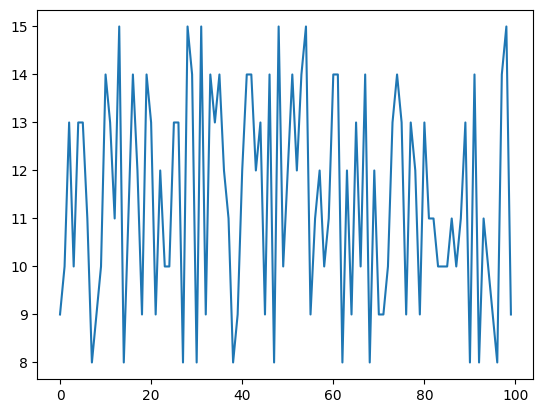

In [277]:
grade_df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<Axes: >

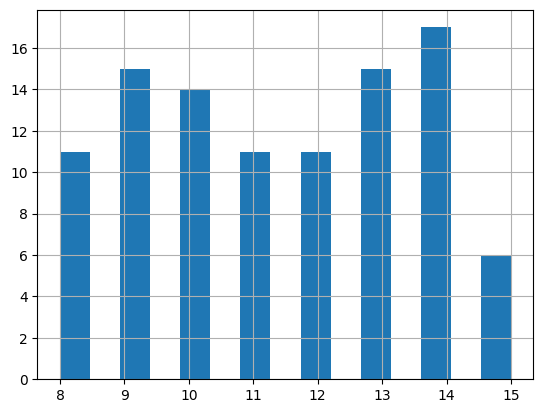

In [278]:
grade_df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [279]:
grade_df.國文.mean()

np.float64(11.39)

算標準差。

In [280]:
grade_df.國文.std()

np.float64(2.196852661459484)

不如就該算的都幫我們算算...

In [281]:
grade_df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [282]:
grade_df.drop(columns=['姓名']).corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [283]:
grade_df.國文.corr(grade_df.數學)

np.float64(-0.3108989822179331)

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [284]:
grade_df['總級分'] = 0. # Resst to zero.
grade_df['總級分'] = grade_df.drop(columns=['姓名']).sum(axis=1)
grade_df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57.0
1,胡玉華,10,10,10,8,9,47.0
2,黃淑婷,13,15,8,11,14,61.0
3,陳上紫,10,10,8,9,14,51.0
4,崔靜成,13,12,14,12,13,64.0


### 【技巧】

有計算的當然也可以的。

In [285]:
grade_df['加權'] = 0
grade_df['加權'] = grade_df.國文 + grade_df.英文 + grade_df.數學 * 2
grade_df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,57.0,49
1,胡玉華,10,10,10,8,9,47.0,40
2,黃淑婷,13,15,8,11,14,61.0,44
3,陳上紫,10,10,8,9,14,51.0,36
4,崔靜成,13,12,14,12,13,64.0,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [286]:
grade_df.sort_values(by='總級分', ascending=False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
12,李正偉,11,15,11,14,15,66.0,48
80,施雅鈴,13,15,12,13,13,66.0,52
37,曾怡君,11,12,15,13,14,65.0,53
25,蔡亦瑄,13,13,14,13,12,65.0,54
54,陳怡潔,15,15,9,15,11,65.0,48
83,李士賢,10,14,15,13,13,65.0,54
87,趙偉希,10,13,14,13,15,65.0,51
64,俞志峰,9,14,13,14,15,65.0,49
48,陳怡婷,15,14,12,9,15,65.0,53
57,胡淳茜,12,15,14,13,11,65.0,55


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [287]:
grade_df2 = grade_df.sort_values(by=['加權','總級分'], ascending=False)
grade_df2.head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
73,吳志遠,13,15,15,8,8,59.0,58
57,胡淳茜,12,15,14,13,11,65.0,55
36,詹威德,12,13,15,10,14,64.0,55
25,蔡亦瑄,13,13,14,13,12,65.0,54
83,李士賢,10,14,15,13,13,65.0,54
44,童心怡,13,13,14,8,13,61.0,54
37,曾怡君,11,12,15,13,14,65.0,53
48,陳怡婷,15,14,12,9,15,65.0,53
4,崔靜成,13,12,14,12,13,64.0,53
67,林哲法,14,9,15,10,14,62.0,53


### 【重點】重設 index

In [288]:
grade_df2.index = range(1, 101)
grade_df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59.0,58
2,胡淳茜,12,15,14,13,11,65.0,55
3,詹威德,12,13,15,10,14,64.0,55
4,蔡亦瑄,13,13,14,13,12,65.0,54
5,李士賢,10,14,15,13,13,65.0,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [289]:
grade_df2[grade_df2.數學 == 15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59.0,58
3,詹威德,12,13,15,10,14,64.0,55
5,李士賢,10,14,15,13,13,65.0,54
7,曾怡君,11,12,15,13,14,65.0,53
10,林哲法,14,9,15,10,14,62.0,53
13,陳竹伯,10,12,15,10,14,61.0,52
15,葉儀依,9,13,15,8,14,59.0,52
18,周育霖,9,12,15,13,12,61.0,51
21,張雅彬,10,11,15,12,8,56.0,51
22,芮秋辛,11,10,15,10,8,54.0,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [290]:
grade_df2[(grade_df2.數學 == 15) & (grade_df2.英文 == 15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,59.0,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [291]:
grade_df2.drop('總級分', axis=1)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [292]:
grade_df2.drop('總級分', axis=1, inplace=True)

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [293]:
grade_df2.drop(5)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [294]:
grade_df2.drop(grade_df2[grade_df2.姓名 == '李士賢'].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

In [295]:
grade_df2[grade_df2.姓名 == '李士賢'].index

Index([5], dtype='int64')

In [296]:
grade_df2.drop(grade_df2[grade_df2.姓名 == '李士賢'].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [297]:
import pandas_datareader as pdr
# df = pdr.get_data_yahoo('AAPL')

In [298]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
df = pd.read_csv('data/aapl.csv', index_col="Date")

In [299]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,87.663936,88.405303,86.854485,87.653156,82.879961,8.628486e+07
std,35.220606,35.433024,35.003571,35.233065,36.073521,6.064339e+07
min,27.481428,28.000000,27.178572,27.435715,24.594294,1.147590e+07
25%,57.686073,58.346784,57.115357,57.822500,51.942879,3.995208e+07
50%,85.470714,86.277141,84.462861,85.588573,77.619613,7.105920e+07
75%,112.499998,113.682503,111.540001,112.590001,108.674675,1.138364e+08
max,175.110001,176.240005,174.649994,176.240005,175.608719,4.702495e+08


#### 只要最後 300 個交易日!

In [300]:
df = df[-300:]
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02
mean,141.606667,142.549267,140.673767,141.709400,140.417399,2.824278e+07
std,19.330470,19.392028,19.094218,19.231542,19.797548,1.167404e+07
min,106.570000,107.680000,104.080002,105.709999,104.036980,1.147590e+07
25%,119.887501,120.397497,119.657499,119.997500,118.098362,2.108535e+07
50%,144.369995,145.215004,143.415001,144.234993,143.054397,2.559310e+07
75%,156.125003,157.227505,155.062504,155.984997,155.296726,3.248898e+07
max,175.110001,176.240005,174.649994,176.240005,175.608719,1.119850e+08


#### 20 日的移動平均

<Axes: xlabel='Date'>

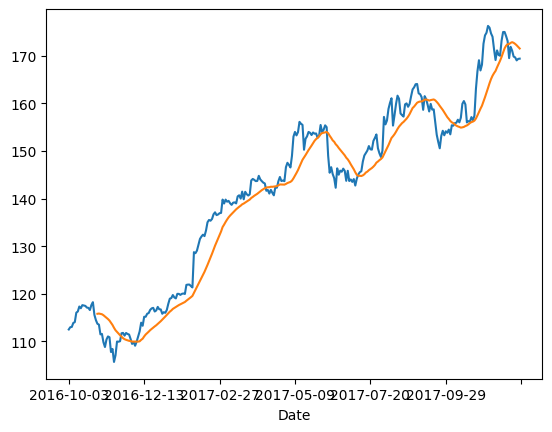

In [301]:
df.Close.plot()
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<Axes: xlabel='Date'>

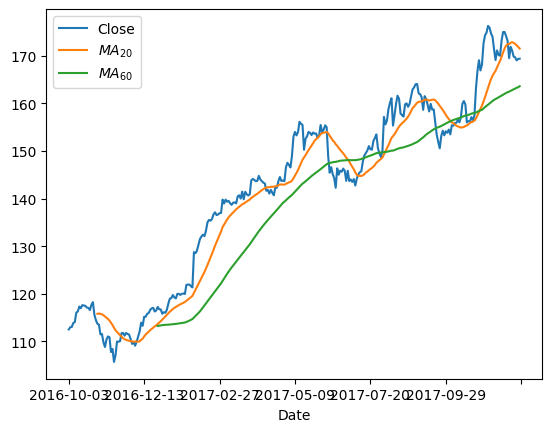

In [302]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [303]:
close = df.Close.values
len(close)

300

In [304]:
x = close[:-1]
len(x)

299

In [305]:
y = close[1:]
len(y)

299

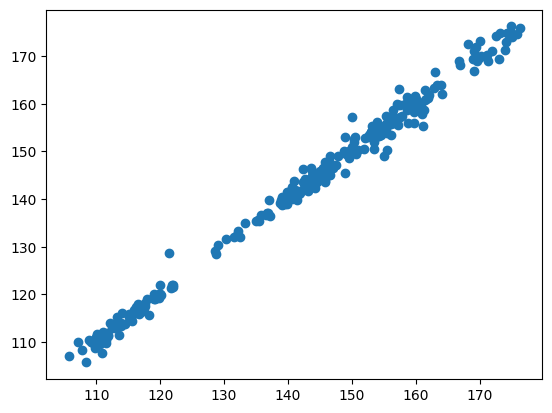

In [306]:
plt.scatter(x, y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [307]:
mydata = np.random.randn(4,3)

In [308]:
mydata

array([[ 0.5415568 ,  0.93876215, -0.08269693],
       [ 0.91950155, -1.37221213,  0.11832513],
       [ 0.29885486,  0.60540691,  0.7916724 ],
       [ 0.89086004, -0.0196812 , -0.76322979]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [309]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [310]:
df2

,A,B,C
0,0.541557,0.938762,-0.082697
1,0.919502,-1.372212,0.118325
2,0.298855,0.605407,0.791672
3,0.890860,-0.019681,-0.763230


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [311]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [312]:
df3

,A,B,C
0,0.426304,0.414816,0.410018
1,0.508814,0.387927,-3.058081
2,0.705170,0.561216,0.306331


In [313]:
df4 = pd.concat([df2, df3], axis=0)

In [314]:
df4

,A,B,C
0,0.541557,0.938762,-0.082697
1,0.919502,-1.372212,0.118325
2,0.298855,0.605407,0.791672
3,0.890860,-0.019681,-0.763230
0,0.426304,0.414816,0.410018
1,0.508814,0.387927,-3.058081
2,0.705170,0.561216,0.306331


前面我們弄得亂七八糟的 index 重設一下。

In [315]:
df4.index = range(7)

In [316]:
df4

,A,B,C
0,0.541557,0.938762,-0.082697
1,0.919502,-1.372212,0.118325
2,0.298855,0.605407,0.791672
3,0.890860,-0.019681,-0.763230
4,0.426304,0.414816,0.410018
5,0.508814,0.387927,-3.058081
6,0.705170,0.561216,0.306331


#### 横向的貼

In [317]:
df5 = pd.concat([df2, df3], axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [318]:
df5

,A,B,C,A,B,C
0,0.541557,0.938762,-0.082697,0.426304,0.414816,0.410018
1,0.919502,-1.372212,0.118325,0.508814,0.387927,-3.058081
2,0.298855,0.605407,0.791672,0.705170,0.561216,0.306331
3,0.890860,-0.019681,-0.763230,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [319]:
df_names = pd.read_csv('data/names.csv', names=['姓名'])

In [320]:
df_names.head()

,姓名
0,羅雅慧
1,王紹尹
2,黃季坤
3,許正書
4,張鈞蓮


In [321]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [322]:
df_grades.head()

,國文,英文,數學,社會,自然
0,9,8,9,8,7
1,9,6,13,14,11
2,12,12,9,9,6
3,10,14,6,15,12
4,9,14,9,7,12


In [323]:
df_concat = pd.concat([df_names, df_grades], axis=1)
df_concat

,姓名,國文,英文,數學,社會,自然
0,羅雅慧,9,8,9,8,7
1,王紹尹,9,6,13,14,11
2,黃季坤,12,12,9,9,6
3,許正書,10,14,6,15,12
4,張鈞蓮,9,14,9,7,12
...,...,...,...,...,...,...
95,陳君生,6,8,11,10,9
96,曾桂甫,9,7,6,10,13
97,林欣怡,15,6,15,8,15
98,林佳霖,13,13,8,13,7


In [324]:
df_concat.to_csv('data/grade3.csv')

In [325]:
df_concat_read = pd.read_csv('data/grade3.csv')

In [326]:
df_concat_read

,Unnamed: 0,姓名,國文,英文,數學,社會,自然
0,0,羅雅慧,9,8,9,8,7
1,1,王紹尹,9,6,13,14,11
2,2,黃季坤,12,12,9,9,6
3,3,許正書,10,14,6,15,12
4,4,張鈞蓮,9,14,9,7,12
...,...,...,...,...,...,...,...
95,95,陳君生,6,8,11,10,9
96,96,曾桂甫,9,7,6,10,13
97,97,林欣怡,15,6,15,8,15
98,98,林佳霖,13,13,8,13,7
